# Forelesning 3: Statistisk analyse

I denne forelesningen skal vi se på statistisk analyse og hvordan vi kan bruke data til å lage modeller.
- gjøre statistiske operasjoner på data (pandas og numpy)
- tolke statistiske størrelser og visualiseringer (som boksplott)
- gjøre og tolke regresjon (numpy)

<img src="https://www.uio.no/studier/emner/matnat/ifi/IN-KJM1900/h21/diverse/pingviner.png" width="500"/>
<img src="https://www.uio.no/studier/emner/matnat/ifi/IN-KJM1900/h21/diverse/pingvin.png" width="500"/>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Statistiske operasjoner

In [21]:
konsentrasjoner = [0.1, 0.2, 0.5, 0.5]
print(np.std(konsentrasjoner,ddof = 1))

0.20615528128088303


In [22]:
pandakons = pd.Series(konsentrasjoner)
print(pandakons.std())

0.20615528128088303


In [29]:
df = pd.read_csv("https://www.uio.no/studier/emner/matnat/ifi/IN-KJM1900/h20/datafiler/vin.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [31]:
pH = df["pH"]
snitt = pH.mean()
avvik = pH.std()
print(f"pH i vinene er {snitt:.2f} +- {avvik:.2f}")

pH i vinene er 3.31 +- 0.15


In [35]:
med = pH.median()
med

3.31

In [41]:
Q1, Q2, Q3 = pH.quantile([0.25, 0.5, 0.75])
IQR = Q3 - Q1
print(f"pH i vinene er {Q2:.2f} +- {IQR:.2f}")

pH i vinene er 3.31 +- 0.19


<Axes: ylabel='pH'>

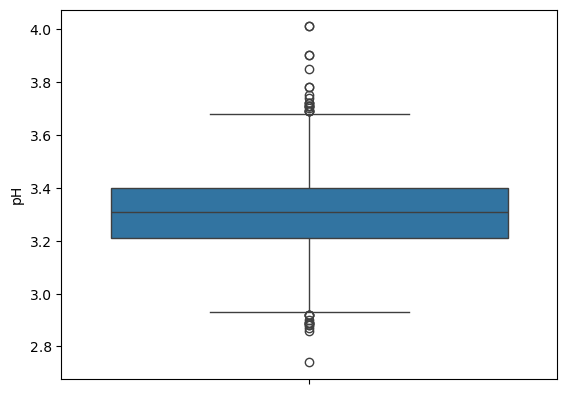

In [43]:
sns.boxplot(data = df, y = "pH")

## Regresjon

|     Temperatur (°C)     |     NH$_3$, løselighet     (g/100 mL H$_2$O)     |     NaCl, Løselighet      (g/100 mL H$_2$O)     |
|-------------------------|--------------------------------------------|----------------------------------------------|
|     0                   |     88.5                                   |     35.7                                     |
|     20                  |     56.0                                   |     35.9                                     |
|     40                  |     34.0                                   |     36.4                                     |
|     60                  |     20.0                                   |     37.1                                     |
|     80                  |     11.0                                   |     38.0                                     |
|     100                 |     7.0                                    |     39.2                                     |

In [55]:
T = [0, 20, 40, 60, 80, 100]
NaCl = [35.7, 35.9, 36.4, 37.1, 38, 39.2]

a, b = np.polyfit(T, NaCl, 1)

In [56]:
x = np.linspace(0,120,10000)
y = a*x + b

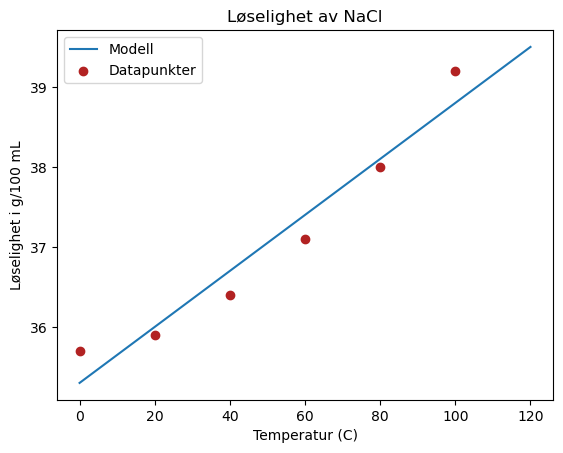

In [54]:
plt.title("Løselighet av NaCl")
plt.plot(x, y, label = "Modell")
plt.scatter(T, NaCl, label = "Datapunkter", color = "firebrick")
plt.xlabel("Temperatur (C)")
plt.ylabel("Løselighet i g/100 mL")
plt.legend()
plt.show()